<a href="https://colab.research.google.com/github/ascle/colab_tcc2/blob/dev/5_modelagem-classificacao_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 - Explorar modelos diferentes

### Importando bibliotecas<hr style='border: 2px solid red;'>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Outras configurações<hr style='border: 2px solid red;'>



In [2]:
!pip install ipython-autotime
pd.set_option('display.max_columns', None)
%load_ext autotime

SEED = 7
np.random.seed(SEED)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
time: 781 µs (started: 2023-09-19 17:35:12 +00:00)


### Conectando no ambiente que será utilizado<hr style='border: 2px solid red;'>


In [3]:
# Importando do Drive
from google.colab import drive
from os import chdir

drive.mount('/content/drive', force_remount=True)
chdir('/content/drive/MyDrive/UFS/tcc-2-ascle-ufs/bases/linkage_marco/')

Mounted at /content/drive
time: 20.2 s (started: 2023-09-19 17:35:12 +00:00)


#### Leitura dos dados

In [4]:
data_raw = pd.read_csv('dn_etl.csv', sep=';', low_memory=False)
data_raw.sort_index(axis=1, inplace=True)

time: 2.31 s (started: 2023-09-19 17:35:32 +00:00)


In [5]:
data_raw.shape

(190020, 24)

time: 5.47 ms (started: 2023-09-19 17:35:35 +00:00)


In [6]:
data_raw.head()

,ANO,APGAR1,APGAR5,CODANOMAL_QTD,CONSPRENAT,ESCMAEETL_VALOR,ESTCIVMAE_COMPANHEIRO,GRAVIDEZ_VALOR,LOCNASC_DOMICILIO,LOCNASC_ESTAB_SAUDE,LOCNASC_HOSPITAL,LOCNASC_OUTROS,OBT_NEONATAL,PARTO_CESAREO,PARTO_VAGINALL,PESO,QTDFILMORT,QTDPARTCES,SEMAGESTAC,SEXO_FEM,SEXO_MASC,TPAPRESENT_CEFALICO,TPAPRESENT_PELVICO,TPAPRESENT_TRANSVERSA
0,2015,2.0,4.0,0.0,5.0,1,0,1,0,0,1,0,0,1,0,820.0,1.0,NaN,26.0,0,1,1,0,0
1,2015,9.0,10.0,0.0,8.0,4,1,1,0,0,1,0,0,1,0,4200.0,1.0,NaN,39.0,0,1,1,0,0
2,2015,7.0,8.0,0.0,10.0,11,1,1,0,0,1,0,0,0,1,3700.0,0.0,0.0,40.0,1,0,1,0,0
3,2015,7.0,8.0,0.0,7.0,4,0,1,0,0,1,0,0,0,1,3550.0,1.0,0.0,37.0,0,1,1,0,0
4,2015,9.0,10.0,0.0,3.0,11,0,1,0,0,1,0,0,1,0,3800.0,0.0,NaN,39.0,1,0,1,0,0


time: 49.9 ms (started: 2023-09-19 17:35:35 +00:00)


## Dados X e y<hr style='border: 2px solid red;'>

In [7]:
X_raw= data_raw.drop(columns=['QTDPARTCES', 'ANO', 'OBT_NEONATAL'])
y_raw= data_raw["OBT_NEONATAL"]

time: 21.7 ms (started: 2023-09-19 17:35:35 +00:00)


## Dados desbalanceados<hr style='border: 2px solid red;'>

https://imbalanced-learn.org/stable/introduction.html

https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

https://www.teses.usp.br/teses/disponiveis/55/55134/tde-06012016-145045/publico/VictorHugoBarella_dissertacao_revisada.pdf

https://www.hashtagtreinamentos.com/datasets-desbalanceados-ciencia-dados


In [8]:
from imblearn.over_sampling import SMOTE

time: 563 ms (started: 2023-09-19 17:35:35 +00:00)


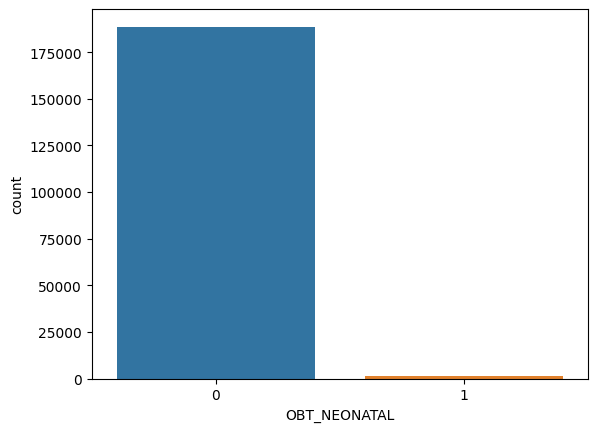

time: 347 ms (started: 2023-09-19 17:35:35 +00:00)


In [9]:
ax = sns.countplot(x='OBT_NEONATAL', data=data_raw)

#### Oversampling Smote

https://arxiv.org/abs/1106.1813

Consiste em criar observações intermediárias entre dados parecidos

In [10]:
smt = SMOTE(random_state=SEED)
X_bal, y_bal = smt.fit_resample(X_raw, y_raw)

time: 433 ms (started: 2023-09-19 17:35:36 +00:00)


In [11]:
data_bal = pd.concat([X_bal, y_bal], axis=1)

time: 51 ms (started: 2023-09-19 17:35:36 +00:00)


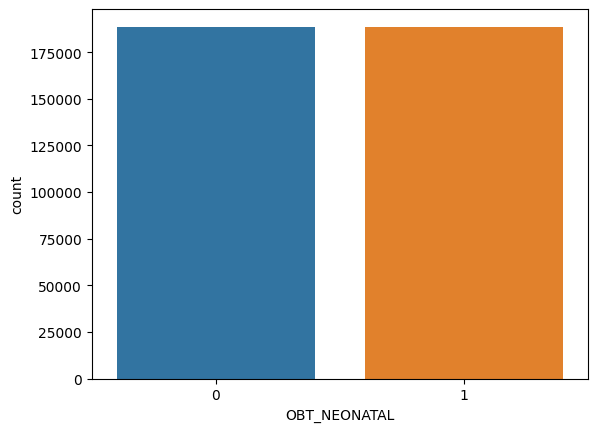

time: 241 ms (started: 2023-09-19 17:35:36 +00:00)


In [12]:
ax = sns.countplot(x='OBT_NEONATAL', data=data_bal)

##Dados de treino e de teste<hr style='border: 2px solid red;'>

In [13]:
from sklearn.model_selection import train_test_split

time: 551 µs (started: 2023-09-19 17:35:37 +00:00)


In [14]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_bal, y_bal, test_size =0.3,
                                                        random_state=SEED,
                                                        shuffle=True,
                                                        stratify=y_bal)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_treino), len(X_teste)))
print()

Treinaremos com 264068 elementos e testaremos com 113172 elementos

time: 262 ms (started: 2023-09-19 17:35:37 +00:00)


### Métodos auxiliares

In [15]:
def imprimir_metricas(_nome_modelo, _predito):
  print("A Acurácia do modelo {} foi {:.2f}%".format(_nome_modelo, (accuracy_score(y_teste, _predito) * 100)))
  print("A Precisão do modelo {} foi {:.2f}%".format(_nome_modelo, (precision_score(y_teste, _predito) * 100)))
  print("A Recall do modelo {} foi {:.2f}%".format(_nome_modelo, (recall_score(y_teste, _predito) * 100)))
  print("A F1 do modelo {} foi {:.2f}%".format(_nome_modelo, (f1_score(y_teste, _predito) * 100)))
  print()

time: 1.02 ms (started: 2023-09-19 17:35:37 +00:00)


In [16]:
def imprime_metrica_cv(_nome_modelo, _results):
    media = _results['test_score'].mean()
    desvio_padrao = _results['test_score'].std()
    ini = (media - 2 * desvio_padrao)*100
    fim = (media + 2 * desvio_padrao) * 100
    print("A Sensibilidade do modelo {} com Cross Validation foi  [{:.2f}%, {:.2f}%]".format(_nome_modelo, ini, fim))
    print()

time: 736 µs (started: 2023-09-19 17:35:37 +00:00)


## Modelos Cross Validate

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import StratifiedKFold

from sklearn import metrics

time: 615 µs (started: 2023-09-19 17:35:37 +00:00)


### SGD Cross Validate
<hr style='border: 2px solid red;'>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [24]:
from sklearn.linear_model import SGDClassifier

time: 525 µs (started: 2023-09-19 17:36:19 +00:00)


In [ ]:
cv = StratifiedKFold(n_splits = 10, shuffle=True)
pip_sgd = make_pipeline(StandardScaler(),
                        SGDClassifier(max_iter=1000, tol=1e-3, random_state=SEED))
results = cross_validate(pip_sgd, X_treino, y_treino, cv = cv, scoring='recall',return_train_score=False)

imprime_metrica_cv('Gradiente Descendente', results)

A Sensibilidade do modelo Gradiente Descendente com Cross Validation foi  [95.58%, 96.48%]

time: 14.5 s (started: 2023-09-19 01:43:08 +00:00)


[Text(0.5, 1.0, 'Confusion Matrix')]

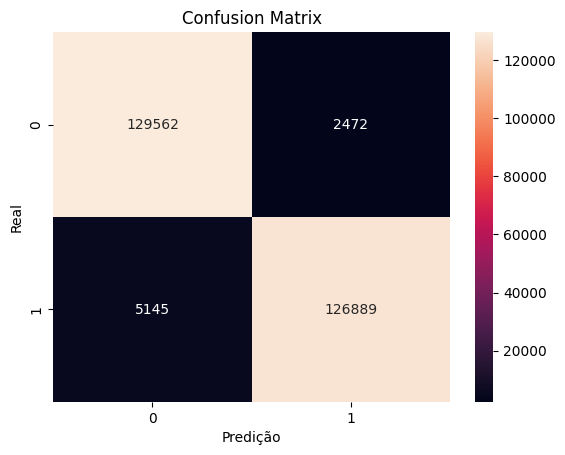

time: 15.3 s (started: 2023-09-19 01:43:23 +00:00)


In [ ]:
y_treino_predit = cross_val_predict(pip_sgd, X_treino, y_treino, cv = cv)
ax = sns.heatmap(data=metrics.confusion_matrix(y_treino, y_treino_predit), annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")
ax.set(title='Confusion Matrix')

### KNN Cross Validate
<hr style='border: 2px solid red;'>

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [23]:
from sklearn.neighbors import KNeighborsClassifier

time: 495 µs (started: 2023-09-19 17:36:16 +00:00)


In [ ]:
cv = StratifiedKFold(n_splits = 10, shuffle=True)
pip_knn = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(metric='euclidean'))
results = cross_validate(pip_knn, X_treino, y_treino, cv = cv, scoring='recall',return_train_score=False)

imprime_metrica_cv('KNN', results)

A Sensibilidade do modelo KNN com Cross Validation foi  [99.59%, 99.83%]

time: 6min 48s (started: 2023-09-19 01:43:38 +00:00)


[Text(0.5, 1.0, 'Confusion Matrix')]

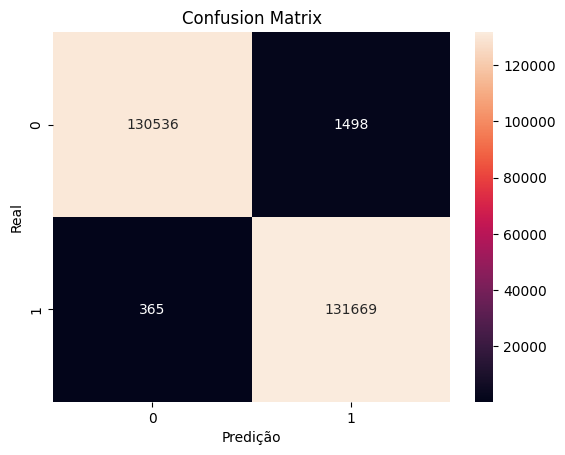

time: 6min 22s (started: 2023-09-19 01:50:27 +00:00)


In [ ]:
y_treino_predit = cross_val_predict(pip_knn, X_treino, y_treino, cv = cv)
ax = sns.heatmap(data=metrics.confusion_matrix(y_treino, y_treino_predit), annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")
ax.set(title='Confusion Matrix')

### Árvore de Decisão Cross Validate
<hr style='border: 2px solid red;'>

In [22]:
from sklearn.tree import DecisionTreeClassifier

time: 532 µs (started: 2023-09-19 17:36:13 +00:00)


In [ ]:
cv = StratifiedKFold(n_splits = 10, shuffle=True)
modelo_dtc_cv = DecisionTreeClassifier()
results = cross_validate(modelo_dtc_cv, X_treino, y_treino, cv = cv, scoring='recall',return_train_score=False)

imprime_metrica_cv('Decision Tree', results)

A Sensibilidade do modelo Decision Tree com Cross Validation foi  [99.47%, 99.69%]

time: 23.7 s (started: 2023-09-19 01:56:50 +00:00)


[Text(0.5, 1.0, 'Confusion Matrix')]

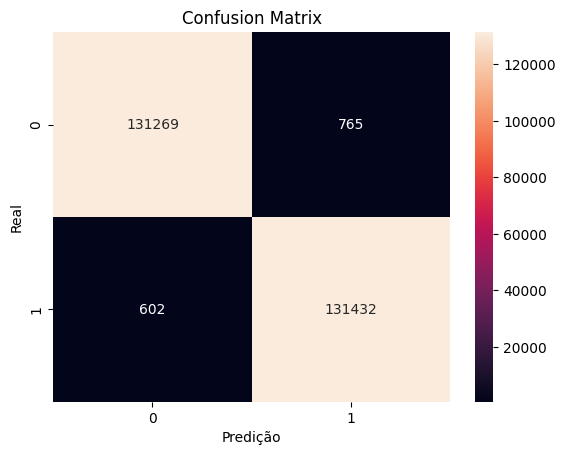

time: 23.6 s (started: 2023-09-19 01:57:13 +00:00)


In [ ]:
y_treino_predit = cross_val_predict(modelo_dtc_cv, X_treino, y_treino, cv = cv)
ax = sns.heatmap(data=metrics.confusion_matrix(y_treino, y_treino_predit), annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")
ax.set(title='Confusion Matrix')

### Random Forest Cross Validate
<hr style='border: 2px solid red;'>

In [21]:
from sklearn.ensemble import RandomForestClassifier

time: 550 µs (started: 2023-09-19 17:36:10 +00:00)


In [ ]:
cv_rf = StratifiedKFold(n_splits = 10, shuffle=True)
modelo_rf_cv = RandomForestClassifier(n_estimators = 100)
results = cross_validate(modelo_rf_cv, X_treino, y_treino, cv = cv_rf, scoring='recall', return_train_score=False)

imprime_metrica_cv('Random Forest', results)

A Sensibilidade do modelo Random Forest com Cross Validation foi  [99.57%, 99.78%]

time: 5min 33s (started: 2023-09-19 01:57:37 +00:00)


[Text(0.5, 1.0, 'Confusion Matrix')]

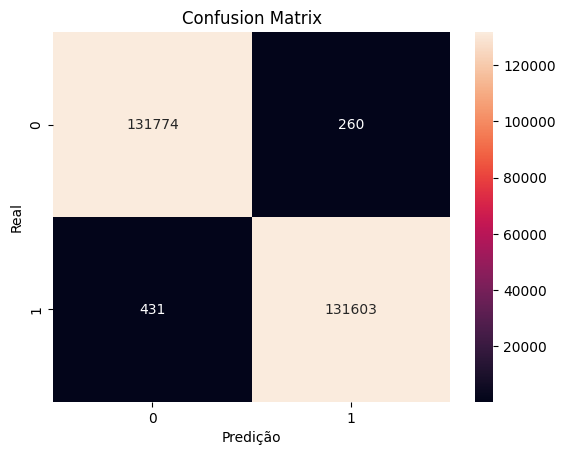

time: 5min 46s (started: 2023-09-19 02:03:10 +00:00)


In [ ]:
y_treino_predit = cross_val_predict(modelo_rf_cv, X_treino, y_treino, cv = cv)
ax = sns.heatmap(data=metrics.confusion_matrix(y_treino, y_treino_predit), annot = True, fmt = "d")
ax.set(xlabel = "Predição", ylabel = "Real")
ax.set(title='Confusion Matrix')

# Melhores Features

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

time: 812 µs (started: 2023-09-19 17:59:30 +00:00)


In [73]:
def grafico_kbest_recall(_dados_sens):
  resultados = pd.DataFrame(_dados_sens, columns = ["best_features", "recall"])
  sns.lineplot(x = "best_features", y = "recall", data = resultados)
  plt.gca().set_xticks(resultados["best_features"].unique())

time: 795 µs (started: 2023-09-19 18:30:12 +00:00)


In [71]:
def rodar_com_scaler(algo, count_kbest):
  steps = [
    ('select', SelectKBest(k=count_kbest)),
    ('scaler', StandardScaler()),
    ('classifier', algo)
    ]

  cv = StratifiedKFold(n_splits = 10, shuffle=True)
  pip = Pipeline(steps=steps)

  results = cross_validate(pip, X_treino, y_treino, cv = cv, scoring='recall',return_train_score=False)
  return count_kbest, results['test_score'].mean()

time: 1.06 ms (started: 2023-09-19 18:26:07 +00:00)


In [76]:
def rodar_sem(algo, count_kbest):
  steps = [
    ('select', SelectKBest(k=count_kbest)),
    ('classifier', algo)
    ]

  cv = StratifiedKFold(n_splits = 7, shuffle=True)
  pip = Pipeline(steps=steps)

  results = cross_validate(pip, X_treino, y_treino, cv = cv, scoring='recall',return_train_score=False)
  return count_kbest, results['test_score'].mean()

time: 977 µs (started: 2023-09-19 19:19:28 +00:00)


## SGD


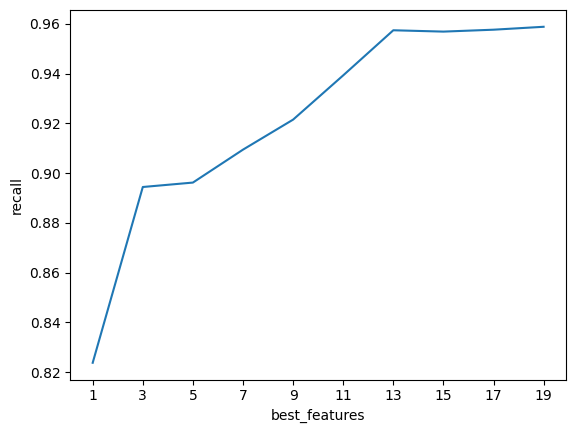

time: 1min 8s (started: 2023-09-19 18:30:42 +00:00)


In [74]:
sens_sgd_kbest = [rodar_com_scaler(SGDClassifier(max_iter=1000, tol=1e-3, random_state=SEED), i) for i in range (1, 20, 2)]
grafico_kbest_recall(sens_sgd_kbest)

## KNN

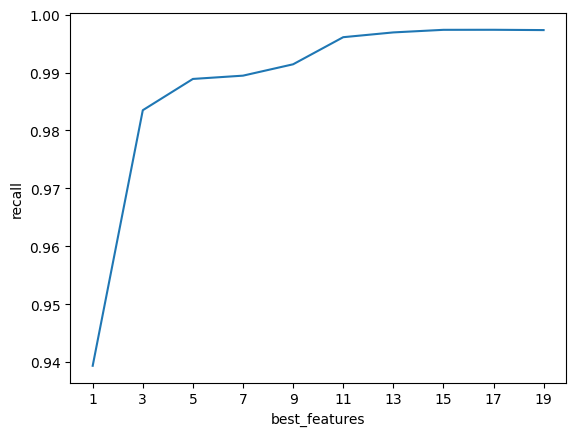

time: 27min 50s (started: 2023-09-19 18:32:15 +00:00)


In [75]:
sens_knn_kbest = [rodar_com_scaler(KNeighborsClassifier(metric='euclidean'), i) for i in range (1, 20, 2)]
grafico_kbest_recall(sens_knn_kbest)

## Árvore

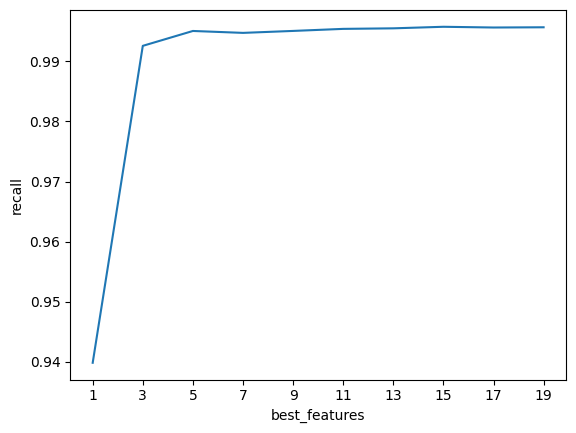

time: 2min 2s (started: 2023-09-19 19:20:19 +00:00)


In [77]:
sens_arvore_kbest = [rodar_sem(DecisionTreeClassifier(), i) for i in range (1, 20, 2)]
grafico_kbest_recall(sens_arvore_kbest)

## Random Forest

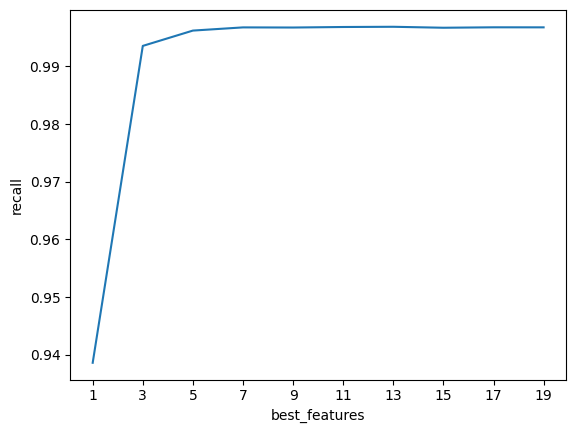

time: 40min 8s (started: 2023-09-19 19:24:21 +00:00)


In [78]:
sens_forest_kbest = [rodar_sem(RandomForestClassifier(n_estimators = 100), i) for i in range (1, 20, 2)]
grafico_kbest_recall(sens_forest_kbest)

## Todos

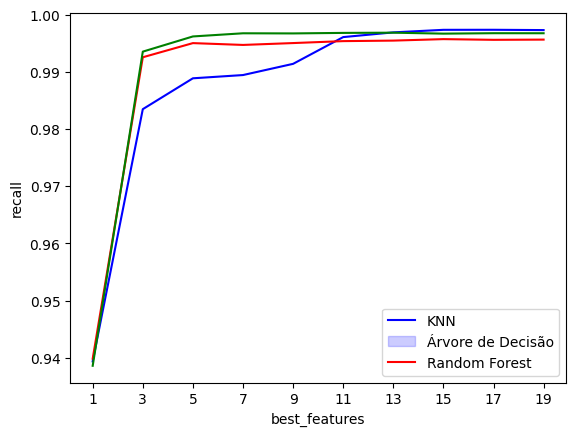

time: 786 ms (started: 2023-09-19 20:17:35 +00:00)


In [94]:
 #resultados = pd.DataFrame(sens_sgd_kbest, columns = ["best_features", "recall"])
 #sns.lineplot(x = "best_features", y = "recall", data = resultados)
 resultados = pd.DataFrame(sens_knn_kbest, columns = ["best_features", "recall"])
 sns.lineplot(x = "best_features", y = "recall", legend="brief", color="blue",data = resultados)
 resultados = pd.DataFrame(sens_arvore_kbest, columns = ["best_features", "recall"])
 sns.lineplot(x = "best_features", y = "recall", legend="brief", color="red", data = resultados)
 resultados = pd.DataFrame(sens_forest_kbest, columns = ["best_features", "recall"])
 sns.lineplot(x = "best_features", y = "recall", legend="brief", color="green", data = resultados)

 plt.gca().set_xticks(resultados["best_features"].unique())
 plt.legend(["KNN", "Árvore de Decisão", "Random Forest"])